In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA
import pydataset

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.DataFrame({'a' : [8.6, 4.7, 3.8, 2.2, 4.6, 6.9, 4.3, 7.8, 5.6],
                   'b' : [167.4, 250.8, 325.6, 865.2, 754.1, 976, 478.2, 523.9, 602.2]}) 

## 복습

In [4]:
df = pd.DataFrame({'a' : [8.6, 4.7, 3.8, 2.2, 4.6, 6.9, 4.3, 7.8, 5.6],
                   'b' : [167.4, 250.8, 325.6, 865.2, 754.1, 976, 478.2, 523.9, 602.2]}) 
#각 열 별 평균 ?
df.mean(axis=0)

#sklearn 없이 정규화
(df-df.min(axis=0))/(df.max(axis=0)-df.min(axis=0)) 

#표준화 
(df-df.mean())/df.std()

,a,b
0,1.570867,-1.374703
1,-0.337003,-1.074467
2,-0.777280,-0.805190
3,-1.559996,1.137346
4,-0.385922,0.737391
5,0.739231,1.536221
6,-0.532681,-0.255837
7,1.179509,-0.091319
8,0.103275,0.190558


In [23]:
#표준화 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler=scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

#정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scalar=scaler.fit(df)
df_scaler=scaler.transform(df)
df_scaler

array([[1.        , 0.        ],
       [0.390625  , 0.10314123],
       [0.25      , 0.1956468 ],
       [0.        , 0.86297304],
       [0.375     , 0.72557507],
       [0.734375  , 1.        ],
       [0.328125  , 0.38436804],
       [0.875     , 0.44088548],
       [0.53125   , 0.53771952]])

In [30]:
from pydataset import data
diamonds=data('diamonds')
diamonds['price'].values.qcut(bins=4)

AttributeError: 'numpy.ndarray' object has no attribute 'qcut'

In [31]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [39]:
bins=range(0,19000,100)
diamonds['price_cat']=pd.cut(diamonds['price'],bins,labels=bins[:-1])
diamonds

diamonds[['cut'],]

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cat
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,300
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,300
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,300
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,300


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
encoder.fit(diamonds['cut'])
encoder.fit(diamonds['color'])
encoder.fit (diamonds['clarity'])
labels1=encoder.transform(diamonds['cut'])
labels2=encoder.transform(diamonds['color'])
labels3=encoder.transform(diamonds['clarity'])
labels1

ValueError: y contains previously unseen labels: 'Ideal'

In [52]:
items = ['cut', 'color', 'clarity']
for i in items:
    encoder = LabelEncoder()
    diamonds[i] = encoder.fit_transform(diamonds[i])
diamonds 

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cat
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,300
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,300
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,300
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,300
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,300
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,2700
53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,2700
53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,2700
53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,2700


In [65]:
#train_test_split 
from sklearn.metrics import accuracy_score
y=diamonds['price_cat']
x=diamonds[['carat','cut','color','clarity','depth','table','x','y','z']]
#x=diamonds.drop(['price_cat','price'])
#x=diamonds.iloc[:,[0,1,2,3,4,5,7,8,9]]

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size =0.3)
dclf=DecisionTreeClassifier()
dclf.fit(x_train,y_train)
pred=dclf.predict(x_test)
accuracy_score(y_test,pred)


0.2835249042145594

In [73]:
#One-Hot Encoding 
#get dummies
#One hot encoder 
cake=data('cake')
cake['recipe']
pd.get_dummies(cake['recipe'])


from sklearn.preprocessing import OneHotEncoder
items=np.array(cake['recipe']).reshape(-1, 1)
encoder=OneHotEncoder()
encoder.fit(items)
labels=encoder.transform(items)
labels.toarray()

,A,B,C
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
266,0,0,1
267,0,0,1
268,0,0,1
269,0,0,1


In [113]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic
y=titanic['Survived']
x= titanic.iloc[:,[2,6,9]]
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size =0.3)
dclf=DecisionTreeClassifier()
dclf.fit(x_train,y_train)
pred=dclf.predict(x_test)
accuracy_score(y_test,pred)
confusion_matrix(y_test,pred)
recall_score(y_test,pred)
precision_score(y_test,pred)

from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.4772727272727273

In [122]:
def clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
    from sklearn.metrics import f1_score
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    rec=recall_score(y_test,pred)
    pre=precision_score(y_test,pred)
    f1=f1_score(y_test,pred)
    print(f"오차행렬: \n{con}\n 정확도: {acc} \n 정밀도: {pre} \n 재현율: {rec} \n f1스코어: {f1}" )

clf_eval(y_test, pred)

오차행렬: 
[[134  34]
 [ 58  42]]
 정확도: 0.6567164179104478 
 정밀도: 0.5526315789473685 
 재현율: 0.42 
 f1스코어: 0.4772727272727273


In [7]:
from sklearn.linear_model import LogisticRegression 
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic
y=titanic['Survived']
x= titanic.iloc[:,[2,6,9]]
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size =0.3)
LR = LogisticRegression(solver = 'liblinear')
LR.fit(x_train,y_train)

pred=LR.predict(x_test)


def clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
    from sklearn.metrics import f1_score
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    rec=recall_score(y_test,pred)
    pre=precision_score(y_test,pred)
    f1=f1_score(y_test,pred)
    print(f"오차행렬: \n{con}\n 정확도: {acc} \n 정밀도: {pre} \n 재현율: {rec} \n f1스코어: {f1}" )

clf_eval(y_test, pred)

오차행렬: 
[[131  31]
 [ 61  45]]
 정확도: 0.6567164179104478 
 정밀도: 0.5921052631578947 
 재현율: 0.42452830188679247 
 f1스코어: 0.4945054945054945


In [14]:
arr=LR.predict_proba(x_test) #확률이 더 큰걸로 고름 왼쪽 0 오른쪽 0 -> 00011 
np.round(LR.predict_proba(x_test)[:,1])
result =np.where(arr>0.5,1,0)[:,1]



In [23]:
from sklearn.preprocessing import Binarizer

arr1=arr[:,1].reshape(-1,1)
bina=Binarizer(threshold= 0.5).fit(arr1)
c_pred=bina.transform(arr1)
get_clf_eval=(y_test, c_pred)

## v피미아 인디언 당뇨병 예측

In [4]:
database =pd.read_csv('https://raw.githubusercontent.com/wikibook/pymlrev2/main/3장/3.6%20피마%20인디언%20당뇨병%20예측.ipynb')

UnicodeEncodeError: 'ascii' codec can't encode character '\uc7a5' in position 29: ordinal not in range(128)

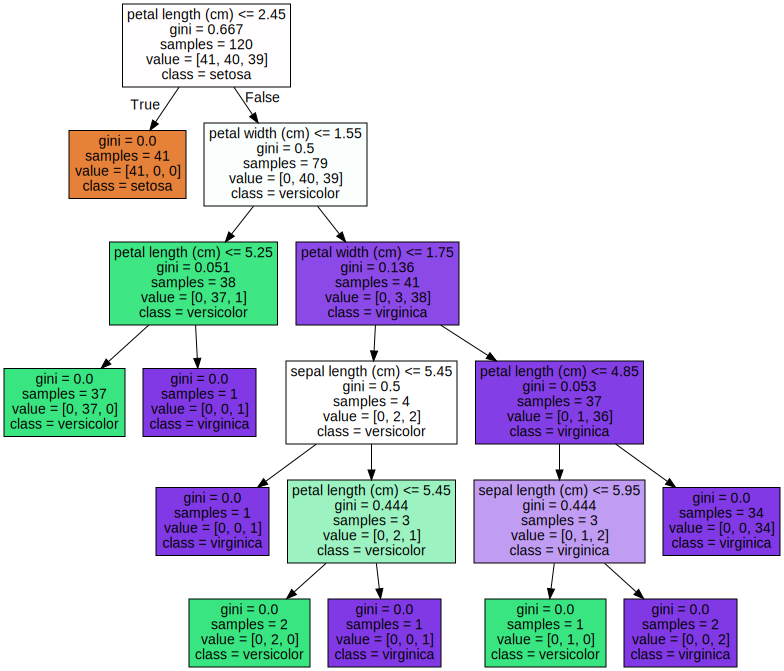

In [5]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

dt_clf= DecisionTreeClassifier(random_state=156)
iris_data= load_iris()
x_train,x_test,y_train,y_test= train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(x_train, y_train)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity = True , filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph= f.read()
graphviz.Source(dot_graph)

In [29]:
conda install python-graphviz

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::daal4py==2021.3.0=py39h01d92e1_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::numba==0.54.1=py39hae1ba45_0
  - defaults/osx-64::bottleneck==1.3.2=py39he3068b8_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::patsy==0.5.2=py39hecd8cb5_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39ha952a84_0
  - defaults/osx-64::bkcharts==0.2=py39hecd8cb5_0
  - defaults/osx-64::matplotlib-base==3.4.3=py39h0a11d32_0
  - defaults/osx-64::astropy==4.3.1=py39hf9932de_0
  - defaults/osx-64::pywavelets==1.1.1=py39he3068b8_4
  - defaults/osx-64::scikit-learn-intelex==2021.3.0=py39hecd8cb5_0
  - defaults/osx-64::h5py==3.2.1=py39h90fc2a2_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::pytables==3.6.1=py39h648f197_1